In [12]:
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model, Input
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model

In [2]:
batch_size = 32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'train',  
        target_size=(150, 150),  
        batch_size=batch_size,
        class_mode='binary')  

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = train_datagen.flow_from_directory(
        'test',  
        target_size=(150, 150),  
        batch_size=batch_size,
        class_mode='binary')  

Found 968 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [3]:
base_model = InceptionV3(weights='imagenet',input_shape=(150,150,3), include_top=False)
base_model.trainable = False
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [4]:
inputs = Input(shape=(150, 150, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
outputs=Dense(1,activation='sigmoid')(x)

In [5]:
model = Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

In [6]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

hist = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
31/31 [==============================] - 39s 974ms/step - loss: 0.0535 - accuracy: 0.9721
Epoch 2/10
31/31 [==============================] - 29s 935ms/step - loss: 3.5331e-05 - accuracy: 1.0000
Epoch 3/10
31/31 [==============================] - 34s 1s/step - loss: 9.6752e-06 - accuracy: 1.0000
Epoch 4/10
31/31 [==============================] - 45s 1s/step - loss: 9.4830e-06 - accuracy: 1.0000
Epoch 5/10
31/31 [==============================] - 51s 2s/step - loss: 3.5975e-06 - accuracy: 1.0000
Epoch 6/10
31/31 [==============================] - 49s 2s/step - loss: 3.4438e-06 - accuracy: 1.0000
Epoch 7/10
31/31 [==============================] - 46s 1s/step - loss: 6.9252e-06 - accuracy: 1.0000
Epoch 8/10
31/31 [==============================] - 46s 1s/step - loss: 1.1792e-05 - accuracy: 1.0000
Epoch 9/10
31/31 [==============================] - 47s 1s/step - loss: 3.7088e-05 - accuracy: 1.0000
Epoch 10/10
31/31 [==============================] - 47s 2s/step - loss: 2.6528e

In [7]:
hist.history

{'loss': [0.05349515378475189,
  3.5331326216692105e-05,
  9.675200999481604e-06,
  9.48304841585923e-06,
  3.597450131564983e-06,
  3.4438276088621933e-06,
  6.925243269506609e-06,
  1.1791790711868089e-05,
  3.708840085892007e-05,
  2.652847342687892e-06],
 'accuracy': [0.9721074104309082, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

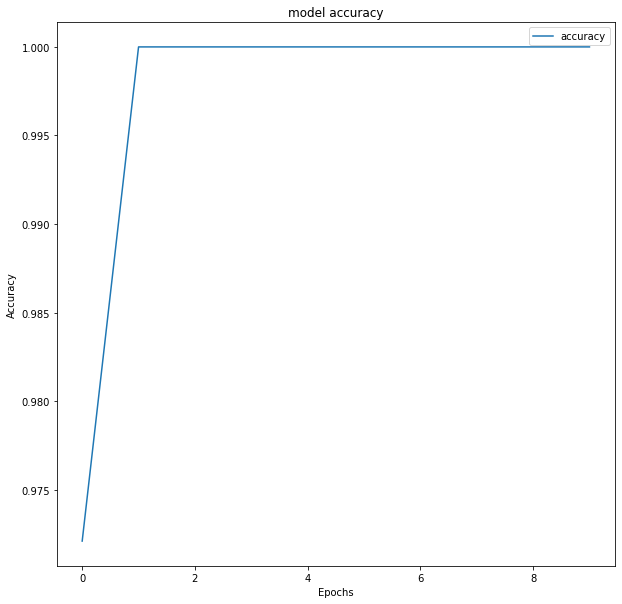

In [8]:
plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["accuracy"])
plt.show()

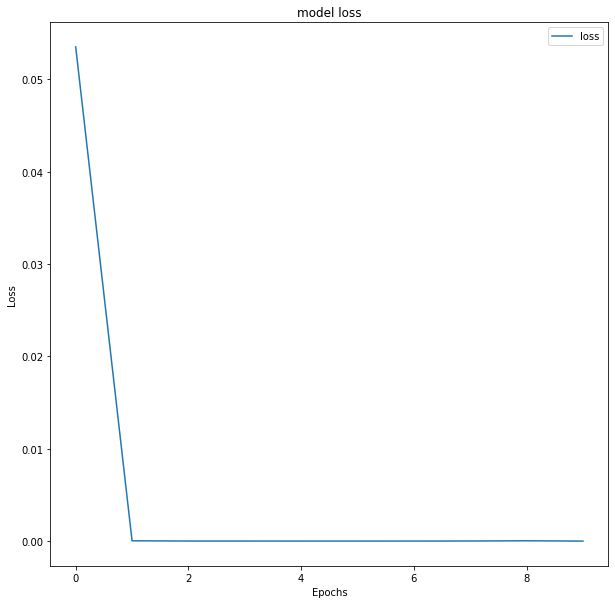

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["loss","Validation Loss"])
plt.show()

In [60]:
img = load_img("C:/Users/aaaya/Desktop/Workspace/Banana-Strawberry_Classification/realtest/Banana_4.jpg", target_size=(150,150))
img_array = np.array(img)/255.
img_array = np.expand_dims(img_array, 0)  
predictions = model.predict(img_array)
score = predictions[0]
print("This image is %.2f percent Banana and %.2f percent Strawberry."% (100 * (1 - score), 100 * score))
score

1/1 [==============================] - 0s 55ms/step
This image is 100.00 percent Banana and 0.00 percent Strawberry.


array([3.9694376e-14], dtype=float32)

array([0.9999991], dtype=float32)

In [11]:
classifier_json=model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
    model.save_weights("my_model_weights.h5")
    model.save("model.h5")
    print("Saved model to disk")

Saved model to disk


In [13]:
filepath = 'C:/Users/aaaya/Desktop/Workspace/Banana-Strawberry_Classification/model.h5'
model = load_model(filepath)
print(model)
print("Model Loaded Successfully")

Model Loaded Successfully


In [69]:
img = "C:/Users/aaaya/Desktop/Workspace/Banana-Strawberry_Classification/realtest/Strawberry_4.jpg"

test_img = load_img(img, target_size=(150,150))


test_img = np.array(test_img)/255
test_img = np.expand_dims(test_img, axis = 0)


result = model.predict(test_img)
print(result)

1/1 [==============================] - 0s 69ms/step
[[0.9999991]]


In [68]:
if result <0.5:
    pred = 0
else:
    pred = 1